## 背景
我们知道，我国的汽车牌照由各省的简称 + 24 个英文字母（由于字母不包括I和O）+ 0~9 自由组合而成，因此，训练出能识别这些汉字，字母和数字的深度学习模型成为可能。而汽车牌照识别的原理，这里主要分为三大步：
1. 图像处理
2. 深度学习字符识别模型
3. 文字转语音

## 一、图像处理
主要使用 OpenCV 进行图像的处理工作，包括图像的模糊，形态学处理，车牌图像的提取以及字符图片的分割。



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1、读取图像

(-0.5, 399.5, 299.5, -0.5)

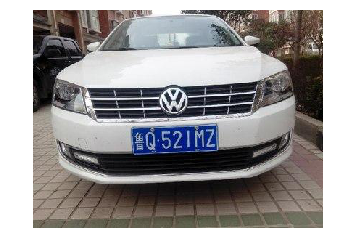

In [2]:
img_file = "../dataset/test/car3.jpg"
img = cv2.imread(img_file)
img_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # cv2默认是以BGR的格式进行图片的读取的
plt.imshow(img_show)
plt.axis("off")

### 2、图像降噪
使用高斯模糊对图像进行降噪

(-0.5, 399.5, 299.5, -0.5)

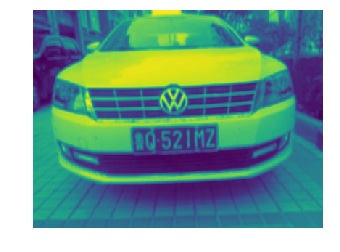

In [3]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gauss_img = cv2.GaussianBlur(gray_img, (5, 5), 0, 0, cv2.BORDER_DEFAULT)
plt.imshow(gauss_img)
plt.axis("off")

### 3、边缘检测
1. 先使用较大的 kernel 对图片执行开运算（先腐蚀，后膨胀），使得车牌区域变成连通的一片。

(-0.5, 399.5, 299.5, -0.5)

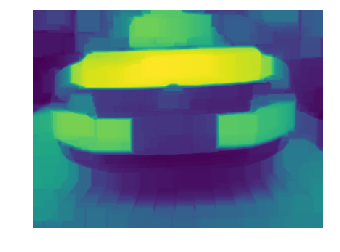

In [5]:
kernal = np.ones((23, 23), np.uint8)
img_opening = cv2.morphologyEx(gauss_img, cv2.MORPH_OPEN, kernal)
plt.imshow(img_opening)
plt.axis("off")

2. 执行顶帽运算（原图像 - 开运算图像），可以突出原图像中比周围亮的区域

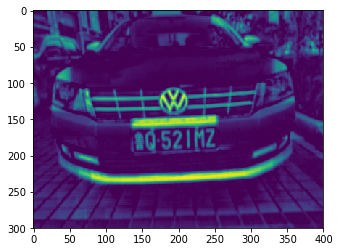

In [8]:
img_top_hat = cv2.addWeighted(gauss_img, 1, img_opening, -1, 0)
plt.imshow(img_top_hat)